<a href="https://colab.research.google.com/github/bakshitarun/python3/blob/main/tensorflow/RegressionTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import tensorflow as tf
print(tf.__version__)

2.7.0


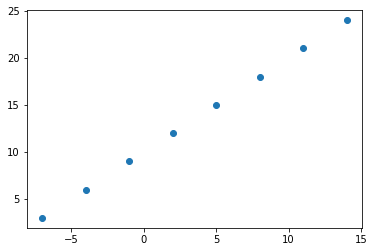

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [54]:
X[0].ndim

0

In [55]:
X = tf.constant(X)
y = tf.constant(y)

In [56]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [57]:
#Modeling in Tensorflow

tf.random.set_seed(42)

#1. Create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100) ])

#compile the model
model.compile(loss =tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),# stochastic gradient descent
             metrics = ['mae'])

#fit the model
#for tensorflow 2.7+ if you are passing a vector to the model then you need to expand its dimensions
model.fit(tf.expand_dims(X,axis=-1),y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 0s 320ms/step - loss: 13.4988 - mae: 13.4988
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 13.4974 - mae: 13.4974
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 13.4961 - mae: 13.4961
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 13.4948 - mae: 13.4948
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 13.4935 - mae: 13.4935


In [58]:
model.predict([14])
#we may need to adjust the model parameters inorder to get better predictions

array([[ 1.1480596 , -0.3776012 , -0.9790084 , -0.21738996, -3.1575506 ,
         1.2853024 ,  1.6636894 ,  2.5667598 , -1.8426952 , -1.8640525 ,
        -1.2690129 ,  1.5423381 , -2.4783266 ,  0.3530136 ,  0.53417003,
         2.7526534 , -3.322682  ,  0.16988944,  0.9432035 , -2.0269442 ,
         1.5907011 ,  0.33779922, -2.6531825 ,  1.2309365 ,  1.1188108 ,
        -1.0877376 ,  0.71712816, -1.9498442 ,  2.4322667 , -0.38022894,
         3.0859916 , -1.7662632 ,  2.1528413 ,  0.20475422, -0.01384518,
        -1.912291  ,  2.3843753 ,  2.5629356 , -1.2826748 ,  1.2998488 ,
        -1.7654822 ,  1.9476265 ,  3.2130017 , -2.9184105 ,  2.0637572 ,
         1.118885  ,  0.61976695, -2.263833  ,  1.6499374 , -1.199728  ,
         0.75788593, -0.21225654,  3.2873688 ,  1.5421925 , -1.1797318 ,
         2.2482512 ,  0.00924572, -2.057597  ,  1.7916996 , -1.0802716 ,
        -1.4676578 , -1.2366126 ,  0.7532409 ,  1.7301766 ,  0.03595695,
        -2.1395946 , -2.487806  ,  1.023847  ,  3.1

In [ ]:
#Improving our model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu')
    , tf.keras.layers.Dense(1)
])

#compile the model

model2.compile(loss = tf.keras.losses.mae, 
               optimizer =tf.keras.optimizers.Adam(lr=0.01),metrics = ['mae'])

import time

myTime =time.time()
model2.fit(tf.expand_dims(X,axis=-1),y, epochs = 1000)

print('total:' +str(time.time()-myTime))

In [60]:
model2.predict([14])

array([[24.114292]], dtype=float32)

##Evaluating our Model

In [61]:
 #Creating a bigger dataset
 X =tf.range(-100,100,4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y= X + 10
y 

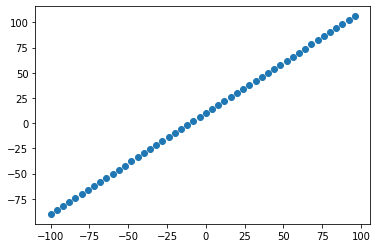

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

## Converting data into 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data
* **Test set** - The model gets evaluated on this data to test what it has learned - generally 10-15% of data


In [64]:
#For now lets split data into test and train

#Train Data
X_train = X[:40]
y_train = y[:40]

#test data
X_test = X[40:]
y_test =y[40:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

##Visualizing the data

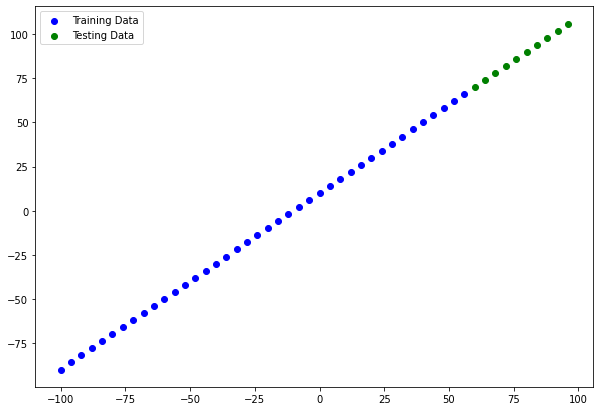

In [65]:
plt.figure(figsize=(10,7))
#plot train data
plt.scatter(X_train,y_train,c='b',label = 'Training Data')
#plot test data
plt.scatter(X_test,y_test,c='g',label = 'Testing Data')
plt.legend()

In [72]:
#Running model on train data

#define input shape or else you can run model fit
tf.random.set_seed(42)
model3 = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=[1]
                                                    )])
model3.compile(loss=tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])



model3.build()
model3.summary()




Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* total params: total number of parameters in the model
* trainable params: these are the parameters/patterns the model can update as it trains
* Non Trainable params: these parameters arent updated during training(this is typical when you bring in already learb patterns/parameters from other models during transfer learning

In [ ]:
model3.fit(X_train,y_train,epochs=100,verbose=1)

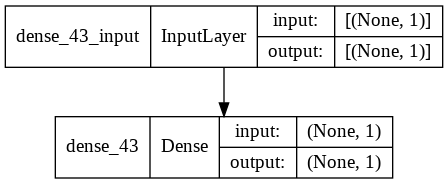

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model=model3,show_shapes = True)

In [ ]:
model4.fit(tf.expand_dims(X,axis=-1),y, epochs = 5)

In [116]:
 #Running model on train data

#define input shape or else you can run model fit
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(10,input_shape=[1] ,name ='input_layer'), #define layer names
                              tf.keras.layers.Dense(1,name = 'output_layer')
                              ],name ='model_desc')
model4.compile(loss=tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])



#model4.build()
model4.summary()

model4.fit(X_train,y_train,epochs=100,verbose=1)


Model: "model_desc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 25.2218 - mae: 25.2218
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6513 - mae: 24.6513
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 24.0944 - mae: 24.0944
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 23.5272 - mae: 23.5272
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 22.9717 -

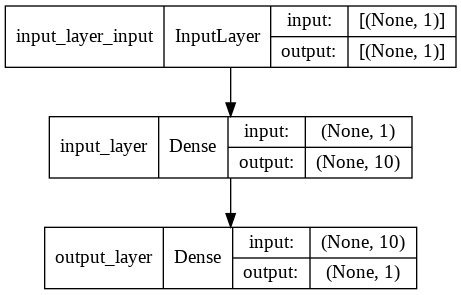

In [117]:
plot_model(model=model4,show_shapes = True)

##visualize Model predictions


In [118]:
y_pred = model4.predict(X_test)

In [119]:
y_pred #y_pred should be same size as y_test

array([[53.968464],
       [57.51139 ],
       [61.05431 ],
       [64.59723 ],
       [68.14016 ],
       [71.683075],
       [75.226   ],
       [78.76892 ],
       [82.31185 ],
       [85.85477 ]], dtype=float32)

In [120]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [121]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))
  #plot train data in blue
  plt.scatter(train_data,train_labels,c='b', label='train data')
  plt.scatter(test_data,test_labels,c='g', label='test data')
  plt.scatter(test_data,predictions,c='r',label='Predictions')

  plt.legend();

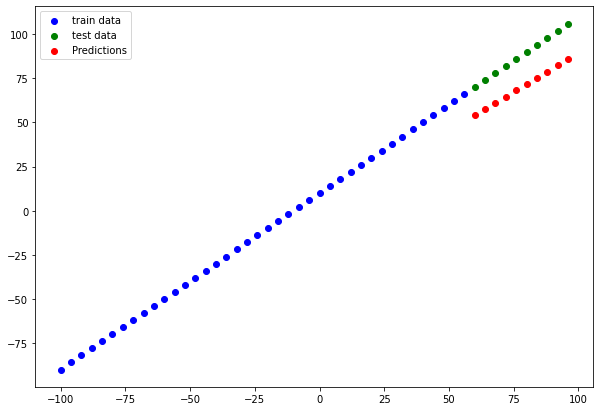

In [122]:
plot_predictions()

##Using Evaluate metrics use evalutaion metrics to correct
Since we are working ona regression, two of the main metrics are


mae - use for smaller errors
mse - use for larger errors


In [123]:
model4.evaluate(X_test,y_test)

1/1 [==============================] - 0s 158ms/step - loss: 18.0884 - mae: 18.0884


[18.0883846282959, 18.0883846282959]

In [131]:
tf.metrics.mean_absolute_error(y_true=y_test,y_pred= tf.squeeze(y_pred))
#using tf squeeze due to extra dimension in y_pred

<tf.Tensor: shape=(), dtype=float32, numpy=18.088383>

In [133]:
#Mean squarred error
tf.metrics.mean_squared_error(y_true=y_test,y_pred= tf.squeeze(y_pred))
#using tf squeeze due to extra dimension in y_pred


<tf.Tensor: shape=(), dtype=float32, numpy=328.9132>